In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#suppress warning
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
data = pd.read_csv('telecom_churn_data.csv')

In [4]:
print("We have {} records with {} columns".format(data.shape[0],data.shape[1]))

We have 99999 records with 226 columns


In [5]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# Data Cleaning

## Handling duplicate records

In [6]:
data = data.drop_duplicates()
print("We still have {} records, meaning no duplicate records found".format(data.shape[0]))

We still have 99999 records, meaning no duplicate records found


## Data Structural Checks

In [7]:
# Identifying columns with only one value
cols_one_unique=[]
for i in data.columns:
    if len(data[i].value_counts())==1:
        print(i,' -> ',data[i].unique())
        cols_one_unique.append(i)

circle_id  ->  [109]
loc_og_t2o_mou  ->  [ 0. nan]
std_og_t2o_mou  ->  [ 0. nan]
loc_ic_t2o_mou  ->  [ 0. nan]
last_date_of_month_6  ->  ['6/30/2014']
last_date_of_month_7  ->  ['7/31/2014' nan]
last_date_of_month_8  ->  ['8/31/2014' nan]
last_date_of_month_9  ->  ['9/30/2014' nan]
std_og_t2c_mou_6  ->  [nan  0.]
std_og_t2c_mou_7  ->  [nan  0.]
std_og_t2c_mou_8  ->  [ 0. nan]
std_og_t2c_mou_9  ->  [nan  0.]
std_ic_t2o_mou_6  ->  [nan  0.]
std_ic_t2o_mou_7  ->  [nan  0.]
std_ic_t2o_mou_8  ->  [ 0. nan]
std_ic_t2o_mou_9  ->  [nan  0.]


**None of the values seem to be significant, hence we can drop all of them </br>except the last date of month</br></br> This can be used to detemine how many days till last recharged, hence copies this value to 4 variables**

In [8]:
LDOM_6, LDOM_7, LDOM_8, LDOM_9  = 30,31,31,30 # these variables are used when deriving days since last recharge column

#we'll drop the rest of the columns
data = data.drop(cols_one_unique, axis=1)
print("Number of columns updated from 226 to {}".format(data.shape[1]))

Number of columns updated from 226 to 210


In [9]:
# Updating column names to make it consistent with other columns for month pattern
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

## Handling Missing values

In [10]:
data1 = data.copy()
null_df = pd.DataFrame(round(data1.isnull().sum()/data1.shape[0]*100,2))
null_df.columns = ['null_perc']

In [11]:
null_df[null_df.null_perc > 30]

,null_perc
date_of_last_rech_data_6,74.85
date_of_last_rech_data_7,74.43
date_of_last_rech_data_8,73.66
date_of_last_rech_data_9,74.08
total_rech_data_6,74.85
total_rech_data_7,74.43
total_rech_data_8,73.66
total_rech_data_9,74.08
max_rech_data_6,74.85
max_rech_data_7,74.43


In [12]:
data1 = data1.drop(list(null_df[null_df.null_perc > 30].index),axis=1)

In [13]:
print("Number of columns updated from 210 to {}".format(data1.shape[1]))

Number of columns updated from 210 to 170


In [14]:
null_df[(null_df.null_perc < 30) & (null_df.null_perc > 0)].sort_values(by='null_perc', ascending=False)

,null_perc
loc_ic_t2t_mou_9,7.75
loc_og_t2t_mou_9,7.75
loc_og_t2m_mou_9,7.75
spl_og_mou_9,7.75
std_ic_t2f_mou_9,7.75
loc_og_t2c_mou_9,7.75
std_ic_t2m_mou_9,7.75
loc_og_mou_9,7.75
std_og_t2t_mou_9,7.75
std_ic_t2t_mou_9,7.75


In [15]:
null_cols = list(null_df[(null_df.null_perc < 30) & (null_df.null_perc > 0)].index)
print("{} out of {} columns having missing values ".format(len(null_cols),data1.shape[1]))

112 out of 170 columns having missing values 


### Let's convert the date of last recharge to number, 

In [16]:
from scipy import stats

data2 = data1.copy()

# Here instead of haivng the full date, we'll only have the day value, (which is the only relavent data) 
# and we'll impute date with mode value

data2['date_of_last_rech_6'] = pd.to_datetime(data2['date_of_last_rech_6'], format="%m/%d/%Y").dt.day
data2['date_of_last_rech_7'] = pd.to_datetime(data2['date_of_last_rech_7'], format="%m/%d/%Y").dt.day
data2['date_of_last_rech_8'] = pd.to_datetime(data2['date_of_last_rech_8'], format="%m/%d/%Y").dt.day
data2['date_of_last_rech_9'] = pd.to_datetime(data2['date_of_last_rech_9'], format="%m/%d/%Y").dt.day

# the date of last rech, I'm going to fill this with 0, as only 1.7 % of people are missing and it is very likely 
# these poeple might not have recharged for that month
data2['date_of_last_rech_6'].fillna(0, inplace=True) 
data2['date_of_last_rech_7'].fillna(0, inplace=True) 
data2['date_of_last_rech_8'].fillna(0, inplace=True) 
data2['date_of_last_rech_9'].fillna(0, inplace=True) 

print("Number of null columns before : {}".format(len(null_cols)))
for i in ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']:
    null_cols.remove(i)
print("Number of null columns After : {}".format(len(null_cols)))

Number of null columns before : 112
Number of null columns After : 108


In [17]:
data2.shape

(99999, 170)

In [18]:
# For a quick reference I can say that the missing values from other columns are not because of it is a null value
# ie ( no minutes/ amount is used). as you can see below, 0 is one of the highly used values here
# also majority of the columns in the list are "_mou_" columns, which is number of minutes, so the best approach
# is to impute data with mode value for all mou based columns
for i in range(5):
    print(data2[null_cols[i]].value_counts(normalize=True).head()*100)
    print("\n")

0.00    9.293998
0.33    0.083280
0.26    0.079116
0.48    0.078075
0.31    0.074952
Name: onnet_mou_6, dtype: float64


0.00    9.664032
1.01    0.085292
0.03    0.080092
0.48    0.074891
0.46    0.069690
Name: onnet_mou_7, dtype: float64


0.00    9.954450
0.38    0.091946
1.01    0.087718
0.41    0.081377
0.36    0.078207
Name: onnet_mou_8, dtype: float64


0.00    11.736076
1.01     0.093221
0.38     0.081297
0.41     0.079129
0.36     0.076961
Name: onnet_mou_9, dtype: float64


0.00    3.867294
1.01    0.043722
0.01    0.042681
0.58    0.036435
0.03    0.032271
Name: offnet_mou_6, dtype: float64




**We have majority of the columns minutes, and it is numeric. We cannot assumes the missing values are because of no minutes used as it is clear here the majoirty of data is 0 here, So let's impute the values with mode<br>Also let's validate what all other columns we have other than mou**

In [19]:
mou_lst = []
non_mou_lst = []
for string in null_cols:
    if '_mou_' in string:
        mou_lst.append(string)
    else:
        non_mou_lst.append(string)

In [20]:
for i in non_mou_lst:
    print(data2[i].value_counts(normalize=True).head()*100)
    print("\n")

0.00    82.371802
0.21     0.607941
0.43     0.226937
0.20     0.158231
0.65     0.151985
Name: og_others_6, dtype: float64


0.00    99.639068
0.16     0.016642
0.33     0.007281
0.05     0.007281
0.38     0.006241
Name: og_others_7, dtype: float64


0.00    99.565636
0.16     0.024308
0.01     0.013739
0.03     0.011625
0.11     0.009512
Name: og_others_8, dtype: float64


0.00    99.542567
0.16     0.018427
0.18     0.011924
0.66     0.008672
0.98     0.007588
Name: og_others_9, dtype: float64


0.00    76.949262
0.06     0.830713
0.48     0.790115
0.05     0.747434
0.08     0.719327
Name: ic_others_6, dtype: float64


0.00    79.933430
0.05     0.434783
0.06     0.429582
0.10     0.422301
0.46     0.371333
Name: ic_others_7, dtype: float64


0.00    77.035753
0.10     0.878241
0.06     0.814830
0.08     0.714429
0.13     0.513628
Name: ic_others_8, dtype: float64


0.00    78.064908
0.06     0.613524
0.10     0.561493
0.08     0.536562
0.13     0.394563
Name: ic_others_9, dtype: fl

**Looks like we can impute it with mode value here as well**

### Imputing Missing values

In [21]:
data3 = data2.copy() # data checkpoint

for col in null_cols:
    data3[col].fillna(data3[col].mode()[0], inplace=True)

In [22]:
print("{} null records found now".format(data3.isnull().sum().sum()))

0 null records found now


## Deriving Features

**Obviously we have to derive potential churn customers and also high value customers(among which customer churn should be avoided at all cost)**

- three phases of customer lifecycle :
    - The **‘good’** phase: In this phase, the customer is happy with the service and behaves as usual.
    - The **‘action’** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)\
    - The **‘churn’** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
    
In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.    
<br>
- Churn Dependent Variable
    - Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
    - Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
    - In this project, you will use the **usage-based definition** to define churn.
    - **total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9** columns (9th month) will be used to decide if a customer is at churn risk ( usage based)
- In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
    - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months 
    
<br><br>
## Deriving High Value Customers

In [23]:
# Let's derive the column taking average of 6th and 7th months total expense average 
# to define high value customer. Later we'll drop this column

data4 = data3.copy() # data checkpoint
data4['total_rech_amt_67'] = (data4['total_rech_amt_6']+data4['total_rech_amt_7'])/2
Q7 = data4['total_rech_amt_67'].quantile(q=0.7)
Q7

368.5

In [24]:
data4['HVC'] = data4['total_rech_amt_67'].apply(lambda x: 0 if x<Q7 else 1 )
data4 = data4.drop('total_rech_amt_67', axis=1) # Droping this column
data4['HVC'].value_counts(normalize=True)*100

0    69.9887
1    30.0113
Name: HVC, dtype: float64

## Deriving Churn Flag

In [25]:
data5 = data4.copy() # data checkpoint
data5[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head().T

,0,1,2,3,4
total_ic_mou_9,0.0,188.04,517.74,305.38,205.31
total_og_mou_9,0.0,72.11,124.94,362.54,104.59
vol_2g_mb_9,0.0,0.00,0.00,0.00,0.00
vol_3g_mb_9,0.0,0.00,8.42,0.00,0.00


**Since all these values are numeric and our intention is to find the customer who's usage is absolutly 0, 
we don't need to consider the difference between mb of usage and mou of usage. We can add it both, we'll mark churn customer only the sum is 0**

In [26]:
data5['churn_ind'] =  data5['total_ic_mou_9']+data5['total_og_mou_9']+data5['vol_2g_mb_9']+data5['vol_3g_mb_9']
data5['churn'] = data5['churn_ind'].apply(lambda x: 1 if x==0 else 0)
data5 = data5.drop('churn_ind',axis=1)

In [27]:
print(data5.shape)
data5.churn.value_counts(normalize=True)

(99999, 172)


0    0.898089
1    0.101911
Name: churn, dtype: float64

### Todo for 6 - Nov 23
- [done]impute the missing values with mode and give a reasonable explanation why we did this
- [done]Immediately create high value customer and low value customer
- Do and EDA
- After which combine columsn which makes sense
- drop columns which has high imbalance

# EDA

- We have close to 172 columns
- But most of them are not useful, for example, ic_other, t2m_ic etc are great in details, but the value distribution is highly biased, 
- On the other hand there are total column, total_mou_ic, total_mb_2g etc. these make more sense as when it comes to churn, calling within network or outside network will not make much difference, as compared to having active calls vs no calls at all

**the intention here is to do and EDA, and figure out the columns whic doesn't give much importance**

In [28]:
data5.shape

(99999, 172)

In [29]:
# Lets list out all the columns that has _mou_ ( minutes of usage) and see what these columns means
mou_lst = []
non_mou_lst = []
for string in data5.columns:
    if '_mou_' in string:
        mou_lst.append(string)
    else:
        non_mou_lst.append(string)

In [30]:
print("{} out of {} columns are minutes of usage, the columns are repeated 4 times for each month 6,7,8 and 9, Let's break that as well".format(len(mou_lst),data5.shape[1]))

108 out of 172 columns are minutes of usage, the columns are repeated 4 times for each month 6,7,8 and 9, Let's break that as well


In [31]:
def replace_all(text, replacements):
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

mou_lst = [replace_all(text, {'_6': '_mnt', '_7': '_mnt', '_8': '_mnt', '_9': '_mnt'}) for text in mou_lst]
mou_lst = list(set(mou_lst))

In [32]:
print("Now we have just {} columns to deal with ".format(len(mou_lst)))
mou_lst

Now we have just 27 columns to deal with 


['std_ic_t2t_mou_mnt',
 'roam_ic_mou_mnt',
 'loc_og_mou_mnt',
 'total_ic_mou_mnt',
 'loc_ic_t2t_mou_mnt',
 'std_ic_mou_mnt',
 'roam_og_mou_mnt',
 'total_og_mou_mnt',
 'loc_og_t2m_mou_mnt',
 'spl_ic_mou_mnt',
 'isd_ic_mou_mnt',
 'loc_og_t2c_mou_mnt',
 'std_og_t2t_mou_mnt',
 'loc_ic_t2f_mou_mnt',
 'loc_ic_mou_mnt',
 'std_og_mou_mnt',
 'isd_og_mou_mnt',
 'std_og_t2m_mou_mnt',
 'std_og_t2f_mou_mnt',
 'onnet_mou_mnt',
 'loc_og_t2t_mou_mnt',
 'spl_og_mou_mnt',
 'loc_ic_t2m_mou_mnt',
 'loc_og_t2f_mou_mnt',
 'std_ic_t2f_mou_mnt',
 'offnet_mou_mnt',
 'std_ic_t2m_mou_mnt']

**This can also be devided further into '_ic_' incoming calls, '_og_' outgoing calls, and others**
<br>After this we'll try to analyse this for one months and see does it make any sence to seperate these columns

In [33]:
ic_lst = []
og_lst = []
othr_lst = []
for string in mou_lst:
    if '_ic_' in string:
        ic_lst.append(string)
    elif '_og_' in string:
        og_lst.append(string)
    else:
        othr_lst.append(string)
ic_lst = sorted(ic_lst)
og_lst = sorted(og_lst)
othr_lst = sorted(othr_lst)

In [34]:
print("Incoming Columns")
ic_lst

Incoming Columns


['isd_ic_mou_mnt',
 'loc_ic_mou_mnt',
 'loc_ic_t2f_mou_mnt',
 'loc_ic_t2m_mou_mnt',
 'loc_ic_t2t_mou_mnt',
 'roam_ic_mou_mnt',
 'spl_ic_mou_mnt',
 'std_ic_mou_mnt',
 'std_ic_t2f_mou_mnt',
 'std_ic_t2m_mou_mnt',
 'std_ic_t2t_mou_mnt',
 'total_ic_mou_mnt']

In [35]:
print("Outgoing Columns")
og_lst

Outgoing Columns


['isd_og_mou_mnt',
 'loc_og_mou_mnt',
 'loc_og_t2c_mou_mnt',
 'loc_og_t2f_mou_mnt',
 'loc_og_t2m_mou_mnt',
 'loc_og_t2t_mou_mnt',
 'roam_og_mou_mnt',
 'spl_og_mou_mnt',
 'std_og_mou_mnt',
 'std_og_t2f_mou_mnt',
 'std_og_t2m_mou_mnt',
 'std_og_t2t_mou_mnt',
 'total_og_mou_mnt']

In [36]:
print("Other Columns")
othr_lst

Other Columns


['offnet_mou_mnt', 'onnet_mou_mnt']

**the total_og_mou and total_ic_mou is actually sum of all other columns, which makes good matrix as compared to other columns which will not make influence on churn decison, we'll drop the columns except total**

**Let's check the non_mou_lst, to see if similar combinations are there also**

In [37]:
non_mou_lst = [replace_all(text, {'_6': '_mnt', '_7': '_mnt', '_8': '_mnt', '_9': '_mnt'}) for text in non_mou_lst]
non_mou_lst = list(set(non_mou_lst))
non_mou_lst = sorted(non_mou_lst)
non_mou_lst

['HVC',
 'aon',
 'arpu_mnt',
 'churn',
 'date_of_last_rech_mnt',
 'ic_others_mnt',
 'last_day_rch_amt_mnt',
 'max_rech_amt_mnt',
 'mobile_number',
 'monthly_2g_mnt',
 'monthly_3g_mnt',
 'og_others_mnt',
 'sachet_2g_mnt',
 'sachet_3g_mnt',
 'total_rech_amt_mnt',
 'total_rech_num_mnt',
 'vbc_3g_mnt',
 'vol_2g_mb_mnt',
 'vol_3g_mb_mnt']

**We'll drop these columns**
- mobile_number
- og_others_mnt
- ic_others_mnt
- sachet_2g_mnt
- sachet_3g_mnt
- monthly_2g_mnt
- monthly_3g_mnt
- vbc_3g_mnt

We will keep the other because
- vol_2g/vol_3g gives us the idea like how much data we used ( though it's also biased, it's key matric which we won't remove), so we'll remove sachet, monthly packaege etc, as u can see in below cell , most of these columns are highly biased and mostly 0


**HVC and Churn are out derived columns which will not be dropping**

In [38]:
test = [
 'date_of_last_rech_mnt',
 'last_day_rch_amt_mnt',
 'max_rech_amt_mnt',
 'total_rech_amt_mnt',
 'total_rech_num_mnt',
 'vol_2g_mb_mnt',
 'vol_3g_mb_mnt']
check_list = ['monthly_2g_6','monthly_3g_6','sachet_2g_6','sachet_3g_6', 'vbc_3g_6','ic_others_6','og_others_6','vol_3g_mb_7','vol_2g_mb_7']
for i in check_list:
    print(data5[i].value_counts(normalize=True).head()*100)

0    92.674927
1     6.728067
2     0.562006
3     0.028000
4     0.007000
Name: monthly_2g_6, dtype: float64
0    94.290943
1     4.472045
2     0.861009
3     0.237002
4     0.076001
Name: monthly_3g_6, dtype: float64
0    87.096871
1     5.607056
2     2.461025
3     1.333013
4     0.950010
Name: sachet_2g_6, dtype: float64
0    95.818958
1     2.990030
2     0.607006
3     0.216002
4     0.108001
Name: sachet_3g_6, dtype: float64
0.00    84.870849
0.06     0.010000
0.03     0.010000
0.11     0.008000
0.15     0.007000
Name: vbc_3g_6, dtype: float64
0.00    77.856779
0.06     0.798008
0.48     0.759008
0.05     0.718007
0.08     0.691007
Name: ic_others_6, dtype: float64
0.00    83.065831
0.21     0.584006
0.43     0.218002
0.20     0.152002
0.65     0.146001
Name: og_others_6, dtype: float64
0.00    84.578846
0.01     0.020000
0.06     0.011000
0.07     0.010000
0.02     0.009000
Name: vol_3g_mb_7, dtype: float64
0.00    77.474775
0.01     0.094001
0.02     0.079001
0.03     0.0470

In [39]:
drop_list_non_mou = ['monthly_2g','monthly_3g','sachet_2g','sachet_3g', 'vbc_3g','ic_others','og_others']

In [40]:
# Lets list out all the columns that has _mou_ ( minutes of usage) and see what these columns means
mou_lst = []
non_mou_lst = []
for string in data5.columns:
    if '_mou_' in string:
        mou_lst.append(string)
    else:
        non_mou_lst.append(string)
total_cols = ['total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9']
for i in total_cols:
    mou_lst.remove(i)
print("{} out of {} columns we'll drop since its insiginicance".format(len(mou_lst),data5.shape[1]))
# mou_lst -> to remove

100 out of 172 columns we'll drop since its insiginicance


In [41]:
data6 = data5.copy() # data check point
data6 = data6.drop(mou_lst, axis=1)

In [42]:
drop_lst = []
for string in non_mou_lst:
    for dc in drop_list_non_mou:
        if dc in string:
            drop_lst.append(string)
            

print("{} out of {} columns we'll drop since its insiginicance".format(len(drop_lst),data6.shape[1]))

28 out of 72 columns we'll drop since its insiginicance


In [43]:
data6 = data6.drop(drop_lst, axis=1)

In [44]:
# also we need to drop all the columns for 9th month
# we have used it for calculating Churn variable, and HVC variable
# and Our purpose is to find it with historical data, which means we have to drop 9th columns as well
m9_lst = []
for string in data6.columns:
    if '_9' in string:
        m9_lst.append(string)
        
print("{} out of {} columns we'll drop which are of 9th month".format(len(m9_lst),data6.shape[1]))
m9_lst

10 out of 44 columns we'll drop which are of 9th month


['arpu_9',
 'total_og_mou_9',
 'total_ic_mou_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9']

In [45]:
# also mobile number field which is insignificant as its an identifier, We'll drop that as well
m9_lst.append('mobile_number')
data6 = data6.drop(m9_lst, axis=1)

In [46]:
print("{} rows and {} columns remains".format(data6.shape[0],data6.shape[1]))

99999 rows and 33 columns remains


## Deriving New variables

In [47]:
data7 = data6.copy() # data checkpoint

data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   arpu_6               99999 non-null  float64
 1   arpu_7               99999 non-null  float64
 2   arpu_8               99999 non-null  float64
 3   total_og_mou_6       99999 non-null  float64
 4   total_og_mou_7       99999 non-null  float64
 5   total_og_mou_8       99999 non-null  float64
 6   total_ic_mou_6       99999 non-null  float64
 7   total_ic_mou_7       99999 non-null  float64
 8   total_ic_mou_8       99999 non-null  float64
 9   total_rech_num_6     99999 non-null  int64  
 10  total_rech_num_7     99999 non-null  int64  
 11  total_rech_num_8     99999 non-null  int64  
 12  total_rech_amt_6     99999 non-null  int64  
 13  total_rech_amt_7     99999 non-null  int64  
 14  total_rech_amt_8     99999 non-null  int64  
 15  max_rech_amt_6       99999 non-null 

In [48]:
data7.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,99999.0,282.987358,328.439770,-2258.709,93.4115,197.704,371.0600,27731.088
arpu_7,99999.0,278.536648,338.156291,-2014.045,86.9805,191.640,365.3445,35145.834
arpu_8,99999.0,279.154731,344.474791,-945.808,84.1260,192.080,369.3705,33543.624
total_og_mou_6,99999.0,305.133424,463.419481,0.000,44.7400,145.140,372.8600,10674.030
total_og_mou_7,99999.0,310.231175,480.031178,0.000,43.0100,141.530,378.5700,11365.310
total_og_mou_8,99999.0,304.119513,478.150031,0.000,38.5800,138.610,369.9000,14043.060
total_ic_mou_6,99999.0,200.130037,291.651671,0.000,38.5300,114.740,251.6700,7716.140
total_ic_mou_7,99999.0,202.853055,298.124954,0.000,41.1900,116.340,250.6600,9699.010
total_ic_mou_8,99999.0,198.750783,289.321094,0.000,38.2900,114.660,248.9900,10830.380
total_rech_num_6,99999.0,7.558806,7.078405,0.000,3.0000,6.000,9.0000,307.000


In [49]:
# let's just take columns of a month, and do some analysis how to deal with the rest of the columsn

m6_lst = []
for string in data6.columns:
    if '_6' in string:
        m6_lst.append(string)
m6_lst.append('churn')
m6_lst.append('HVC')
m6_lst.append('aon')
data7[m6_lst].head()

,arpu_6,total_og_mou_6,total_ic_mou_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,vol_2g_mb_6,vol_3g_mb_6,churn,HVC,aon
0,197.385,0.00,0.00,4,362,252,21.0,252,30.13,83.57,1,0,968
1,34.047,40.31,26.83,4,74,44,29.0,44,0.00,0.00,0,0,1006
2,167.690,155.33,370.04,5,168,86,17.0,0,0.00,0.00,0,0,1103
3,221.338,223.23,280.08,10,230,60,28.0,30,0.00,0.00,0,0,2491
4,261.636,127.28,216.44,5,196,56,26.0,50,0.00,0.00,0,0,1526


In [50]:
data7[m6_lst].head().columns

Index(['arpu_6', 'total_og_mou_6', 'total_ic_mou_6', 'total_rech_num_6',
       'total_rech_amt_6', 'max_rech_amt_6', 'date_of_last_rech_6',
       'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'churn', 'HVC',
       'aon'],
      dtype='object')

### Understanding the columns

- **arpu_6**                  : Average revenue per user
- **total_og_mou_6**          : Total Outgoing Minutes used 
- **total_ic_mou_6**          : Total Incoming Minutes used 
- **total_rech_num_6**        : Total number of reacharge in a month
- **total_rech_amt_6**        : Total amount of reacharge in a month
- **max_rech_amt_6**          : Highest amount recharged in a month
- **date_of_last_rech_6**     : Last day recharge date
- **last_day_rch_amt_6**      : Last day recharge amount
- **vol_2g_mb_6**             : 2g data used in a month ( in mb)
- **vol_3g_mb_6**             : 3g data used in a month ( in mb)
- **churn**                   :  Derived (dependent variable)
- **HVC**                     : High value customer flag
- **aon**                     : Age on network - number of days the customer is using the operator T network


### Let's derive one more column from date_of_last_rech, instead of 3 columns we'll have 1 and which will tell us how long ago the customer recharged

In [51]:

data7['date_of_last_rech_7'].value_counts(normalize=True)*100

31.0    17.288173
30.0    13.863139
25.0     9.401094
29.0     9.052091
28.0     7.502075
27.0     5.909059
26.0     5.382054
24.0     3.998040
19.0     3.057031
22.0     2.969030
20.0     2.892029
17.0     2.737027
16.0     2.458025
23.0     2.302023
0.0      1.767018
21.0     1.640016
15.0     1.562016
18.0     1.280013
10.0     0.859009
9.0      0.827008
12.0     0.732007
14.0     0.452005
11.0     0.408004
13.0     0.324003
6.0      0.313003
4.0      0.251003
8.0      0.201002
7.0      0.153002
3.0      0.153002
5.0      0.125001
1.0      0.074001
2.0      0.068001
Name: date_of_last_rech_7, dtype: float64

In [52]:
# So let's call the variables we saved when we initially dropped the column last_day_of_month
print(LDOM_6, LDOM_7, LDOM_8, LDOM_9)

30 31 31 30


In [53]:
data8 = data7.copy() # data checkpoint
def days_since_recharge(row):
    days = 0
    if row['date_of_last_rech_8'] > 0:
        days = LDOM_8 - row['date_of_last_rech_8']
    else:
        if row['date_of_last_rech_7'] > 0:
            days = LDOM_8 + LDOM_7 - row['date_of_last_rech_7']
        else:
            if row['date_of_last_rech_6'] > 0:
                days = LDOM_8 + LDOM_7 + LDOM_6 - row['date_of_last_rech_6']
            else:
                days = LDOM_8 + LDOM_7 + LDOM_6
    return days

data8['day_rech'] = data8.apply(days_since_recharge, axis=1)

## Outlier Validation and EDA

<br><br>
**We now have 4 features are which are not month depedent 
- High Value Customer Flag
- Age on Network
- Churn Risk Flag
- Day since last Recharge

Let's plot these features to do analysis and see the outlier distribution

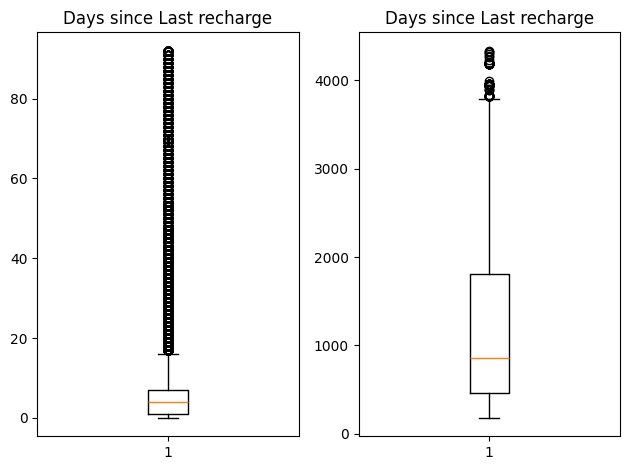

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot(data8.day_rech)
ax1.set_title("Days since Last recharge")

ax2.boxplot(data8.aon)
ax2.set_title("Days since Last recharge")


plt.tight_layout()
plt.show()

In [55]:
# It's clear that the outliers are not actually the outliers but it is being expected behavior
# Let's see how these 2 features affect churn and HVC flags

print("{}% of poeple are likely to churn from normal customers list".format(round(data8.churn.value_counts(normalize=True)[1]*100)))
print("The probablity goes up {}% if we only consider customer who hasn't recharged for 20 days ( Outliers )".format(round(data8[data8.day_rech>20].churn.value_counts(normalize=True)[1]*100)))
print('\n')
print("{}% of poeple are likely to be a High value customer considering all customers".format(round(data8.HVC.value_counts(normalize=True)[1]*100)))
print("But it goes down to {}% if these are from outliers".format(round(data8[data8.day_rech>20].HVC.value_counts(normalize=True)[1]*100)))

10% of poeple are likely to churn from normal customers list
The probablity goes up 33% if we only consider customer who hasn't recharged for 20 days ( Outliers )


30% of poeple are likely to be a High value customer considering all customers
But it goes down to 15% if these are from outliers


**It is clear, 1/3 of outliers are likely to churn from outliers list as compared to 1/10 when considering all data, Also high value customer less likely to be part of these outliers**

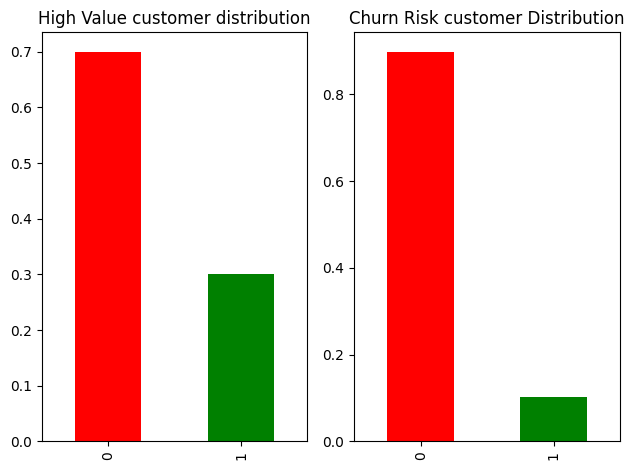

We have 30% of High value customers, and 10% of churn risk customers, There's a clear sign of class imbalance which need to be handled
2593 out 99999 are high impact churn risk customers


In [56]:
fig, (ax1, ax2)  = plt.subplots(1,2)


data8['HVC'].value_counts(normalize=True).plot(kind='bar', ax=ax1, color= ['red','green'])
ax1.set_title('High Value customer distribution')


data8['churn'].value_counts(normalize=True).plot(kind='bar', ax=ax2, color= ['red','green'])
ax2.set_title('Churn Risk customer Distribution')


plt.tight_layout()
plt.show()

print("We have 30% of High value customers, and 10% of churn risk customers, There's a clear sign of class imbalance which need to be handled")
print("{} out {} are high impact churn risk customers".format(data8[data8.HVC == 1].churn.value_counts()[1],data8.shape[0]))

% HVC and Churn risk doesn't seem to be correlated, as the % for churn among non HVC is almost similar to HVC
11% churn risk from non HVC, in HVC it is 9% 
Which is also clear from heatmap


<Axes: >

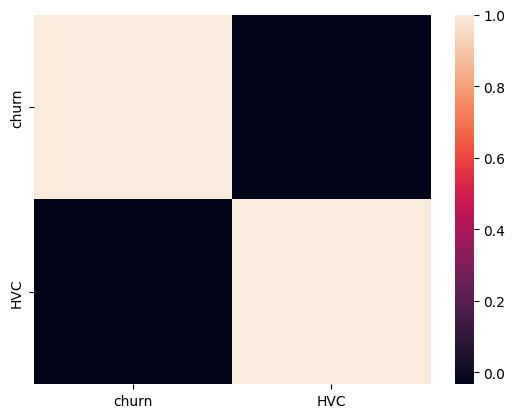

In [57]:
print("% HVC and Churn risk doesn't seem to be correlated, as the % for churn among non HVC is almost similar to HVC")
print("{}% churn risk from non HVC, in HVC it is {}% ".format(round(data8[data8.HVC == 0].churn.value_counts(normalize=True)[1]*100),round(data8[data8.HVC == 1].churn.value_counts(normalize=True)[1]*100)))
print("Which is also clear from heatmap")
sns.heatmap(data8[['churn','HVC']].corr())

In [58]:
data.shape

(99999, 210)

## The next Step

arpu_6 : Average revenue per user
total_og_mou_6 : Total Outgoing Minutes used
total_ic_mou_6 : Total Incoming Minutes used
total_rech_num_6 : Total number of reacharge in a month
total_rech_amt_6 : Total amount of reacharge in a month
max_rech_amt_6 : Highest amount recharged in a month
date_of_last_rech_6 : Last day recharge date
last_day_rch_amt_6 : Last day recharge amount
vol_2g_mb_6 : 2g data used in a month ( in mb)
vol_3g_mb_6 : 3g data used in a month ( in mb)

In [59]:
data8.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'aon', 'HVC', 'churn', 'day_rech'],
      dtype='object')

In [60]:
col6 = []
col7 = []
col8 = []
for string in data8.columns:
    if '_6' in string:
        col6.append(string)
    elif '_7' in string:
        col7.append(string)
    elif '_8' in string:
        col8.append(string)
    else: 
        col6.append(string)
        col7.append(string)
        col8.append(string)
    

In [87]:
def boxPlotGroup(data8,lst):
    columns_to_plot = [
        col for col in lst if col not in ['churn','day_rech','HVC','aon']
    ]

    # Create a subplot grid
    fig, axes = plt.subplots(4, 3, figsize=(15, 12))

    # Plot each column in a grid
    for i, col in enumerate(columns_to_plot):
        ax = axes[i % 4, i // 4]
        data8[col].plot(kind='box', ax=ax)
        ax.set_title(col)

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()

### Month 6 Breakdown

<Axes: >

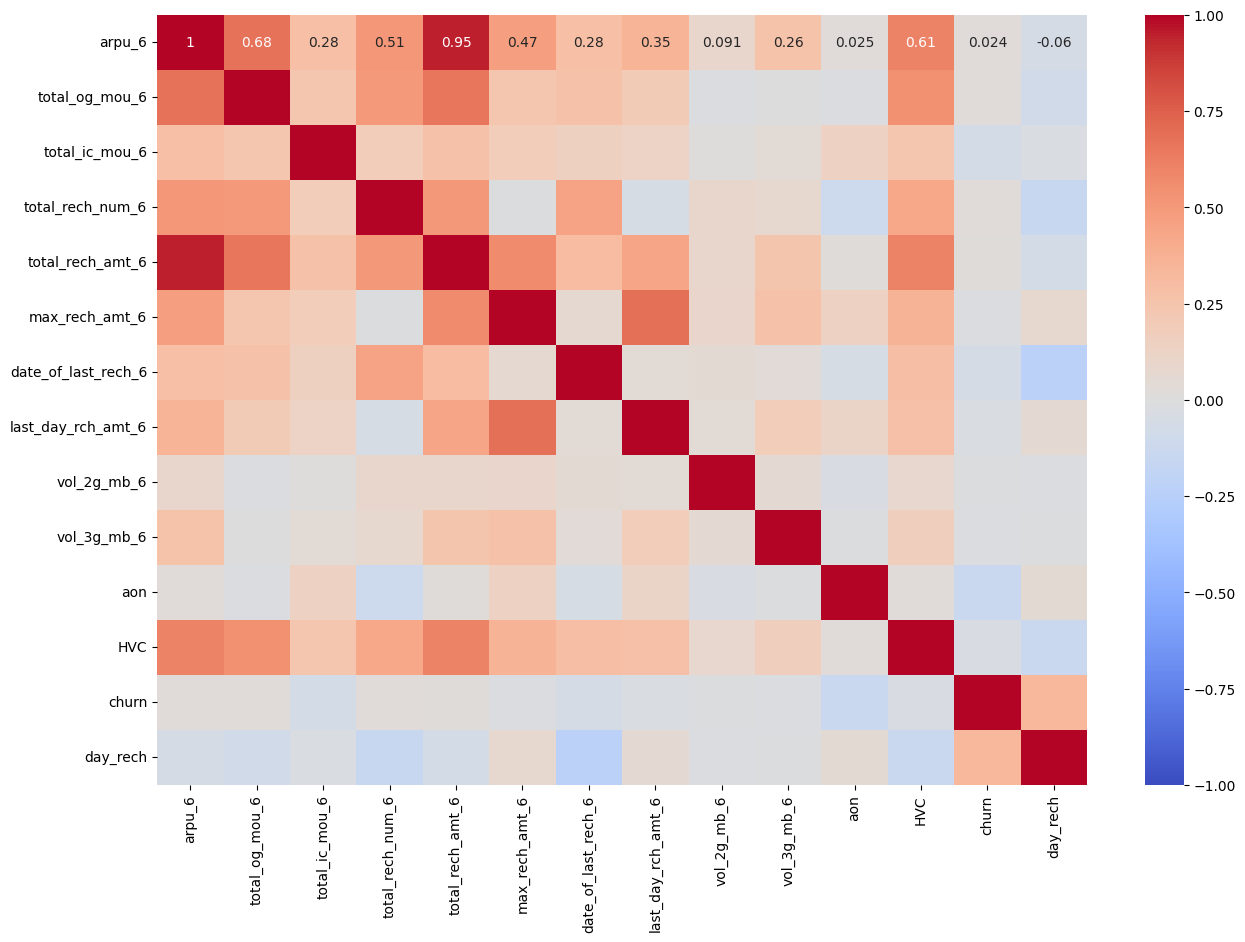

In [81]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data8[col6].corr(), annot=True, cmap='coolwarm', ax = ax, vmin=-1, vmax=1)

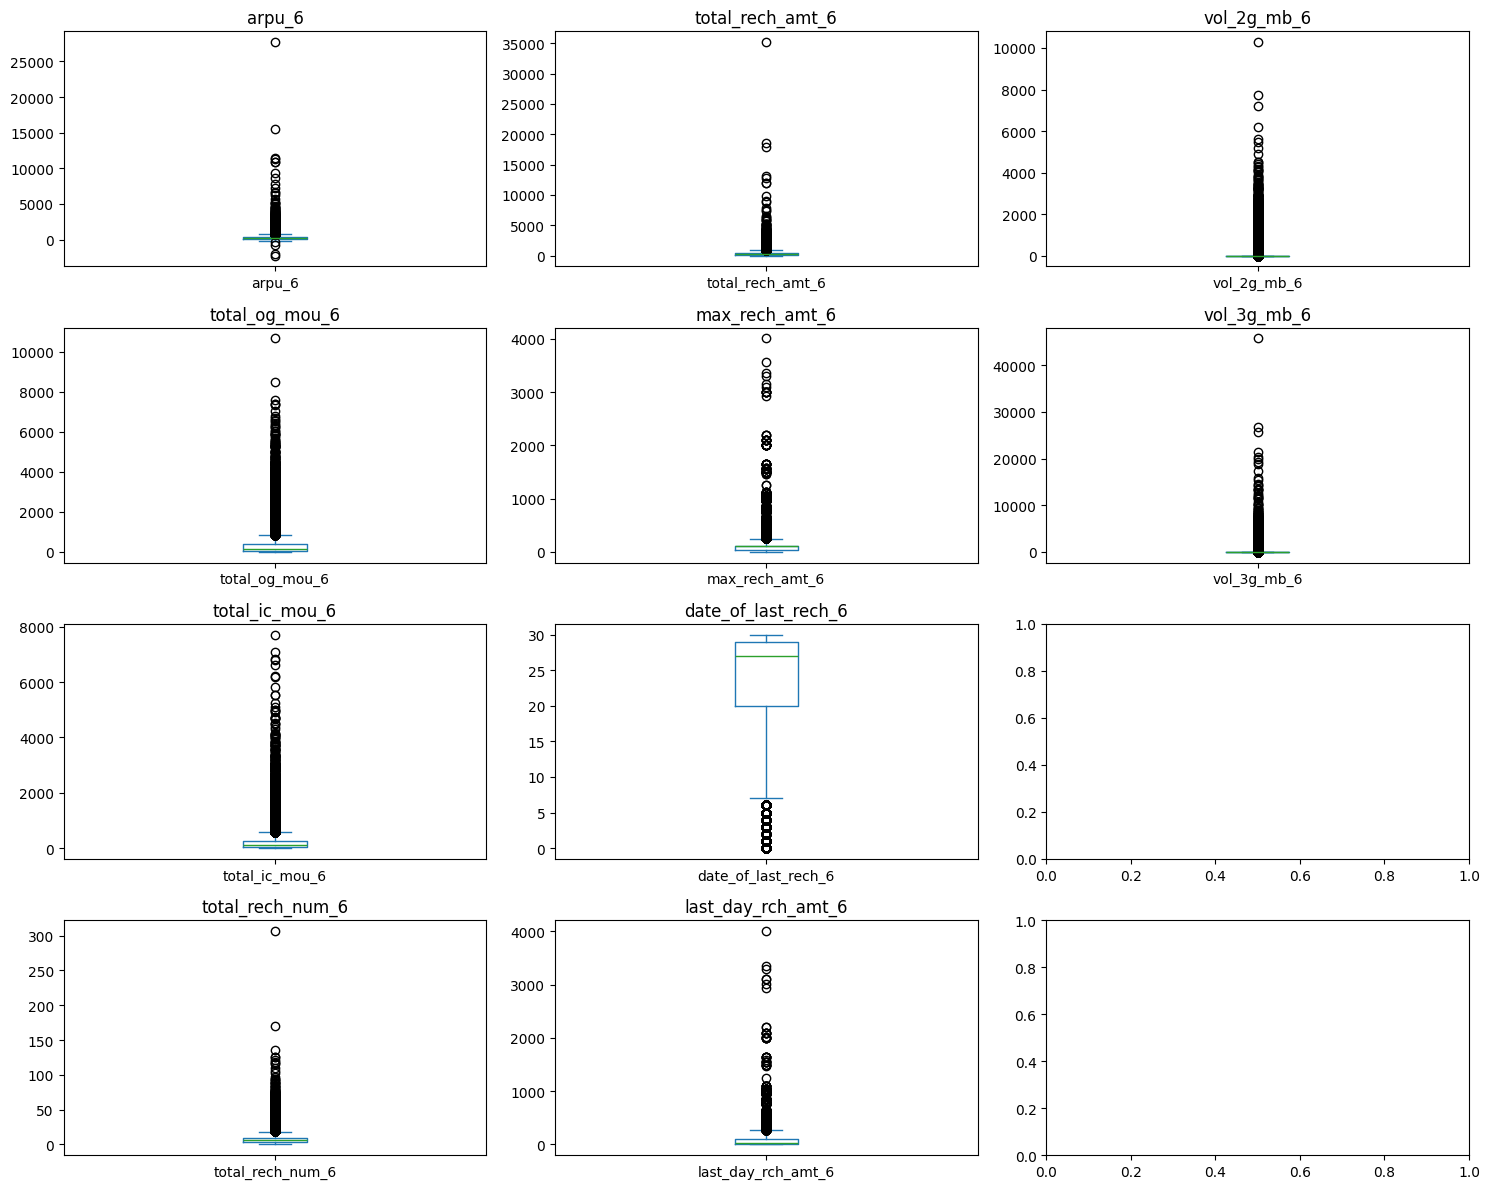

In [91]:
boxPlotGroup(data8,col6)

### Month 7 Breakdown

<Axes: >

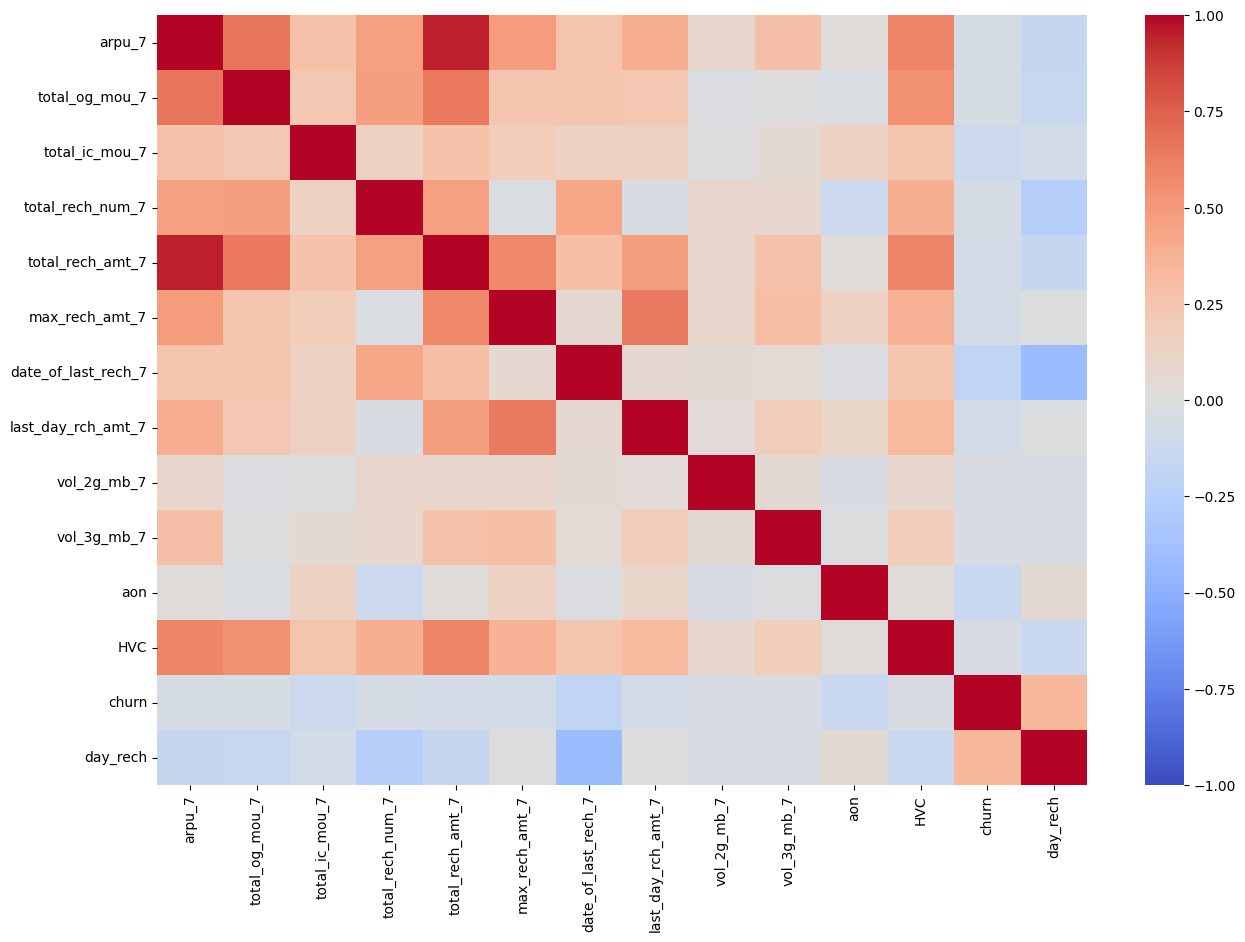

In [82]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data8[col7].corr(), cmap='coolwarm', ax = ax, vmin=-1, vmax=1)

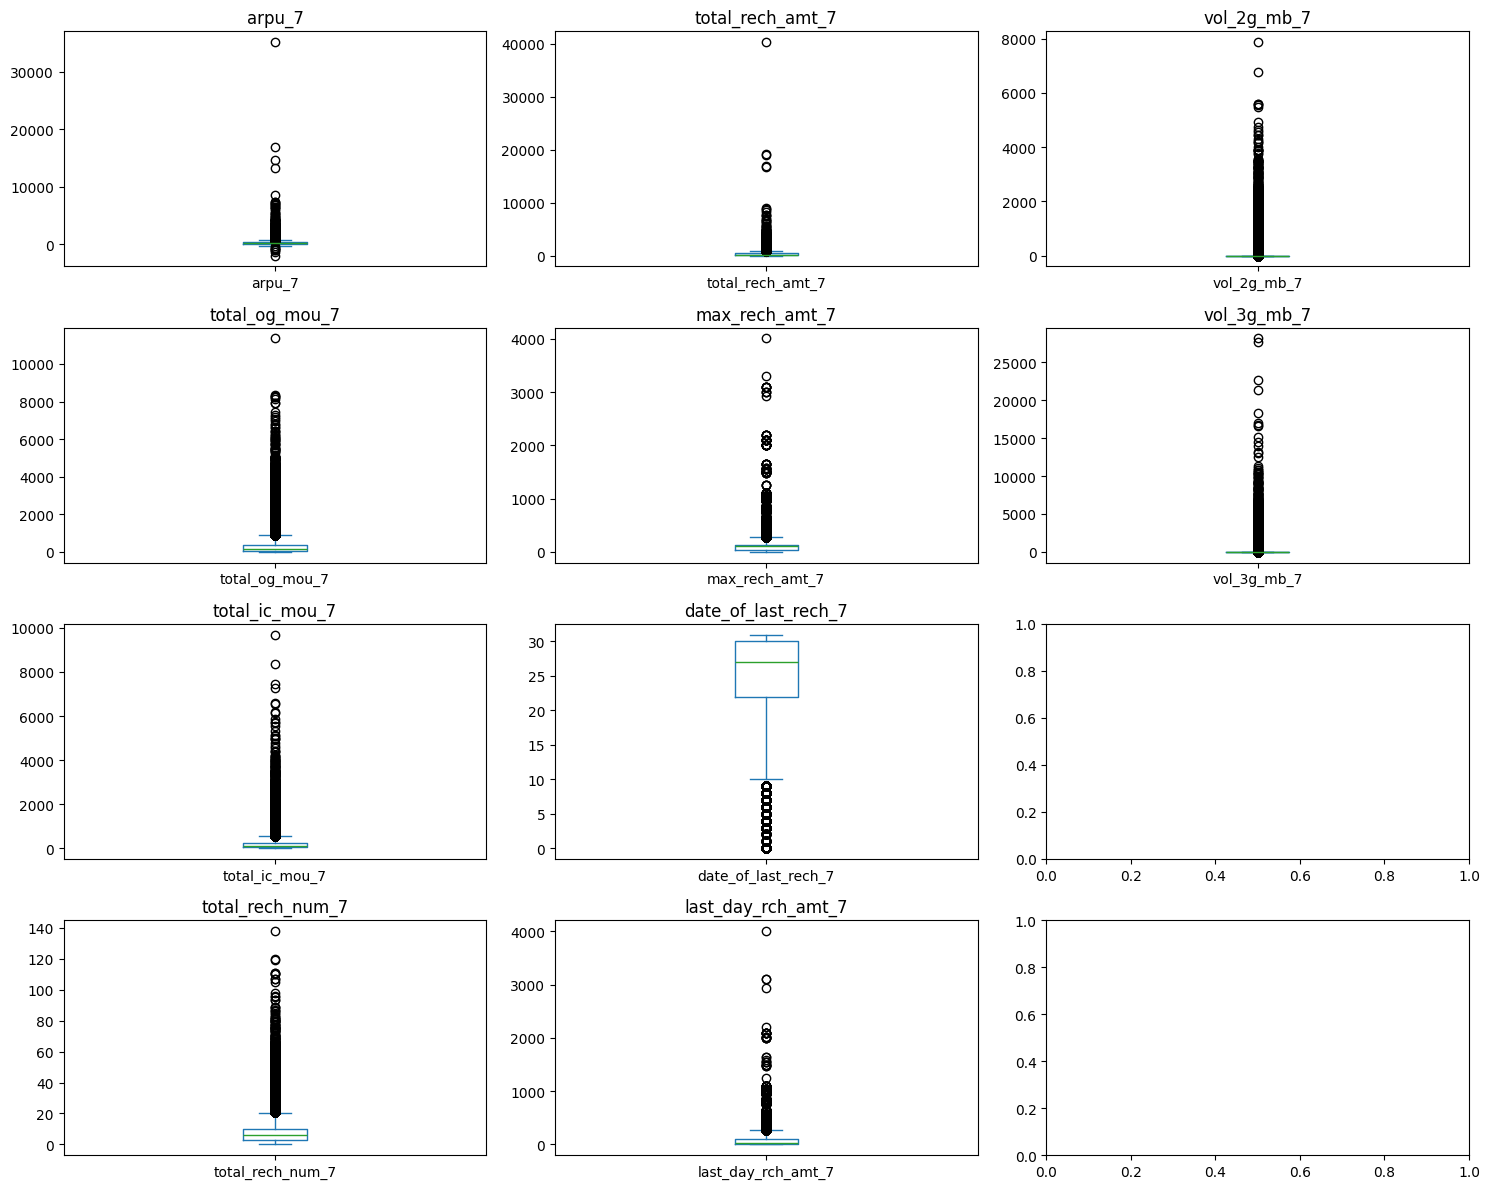

In [90]:
boxPlotGroup(data8,col7)

### Month 8 Breakdown

<Axes: >

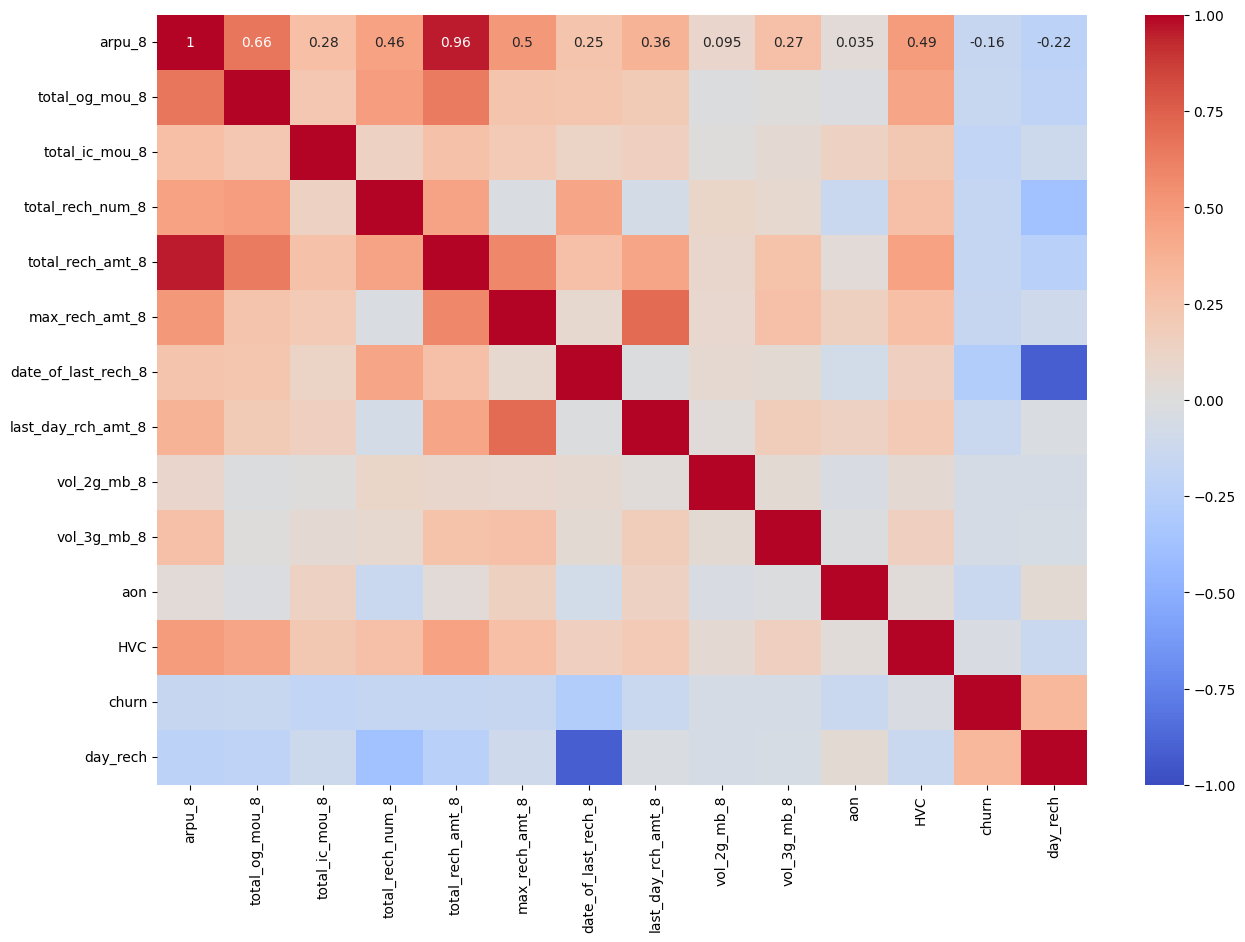

In [83]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data8[col8].corr(), annot=True, cmap='coolwarm', ax = ax ,vmin=-1, vmax=1)

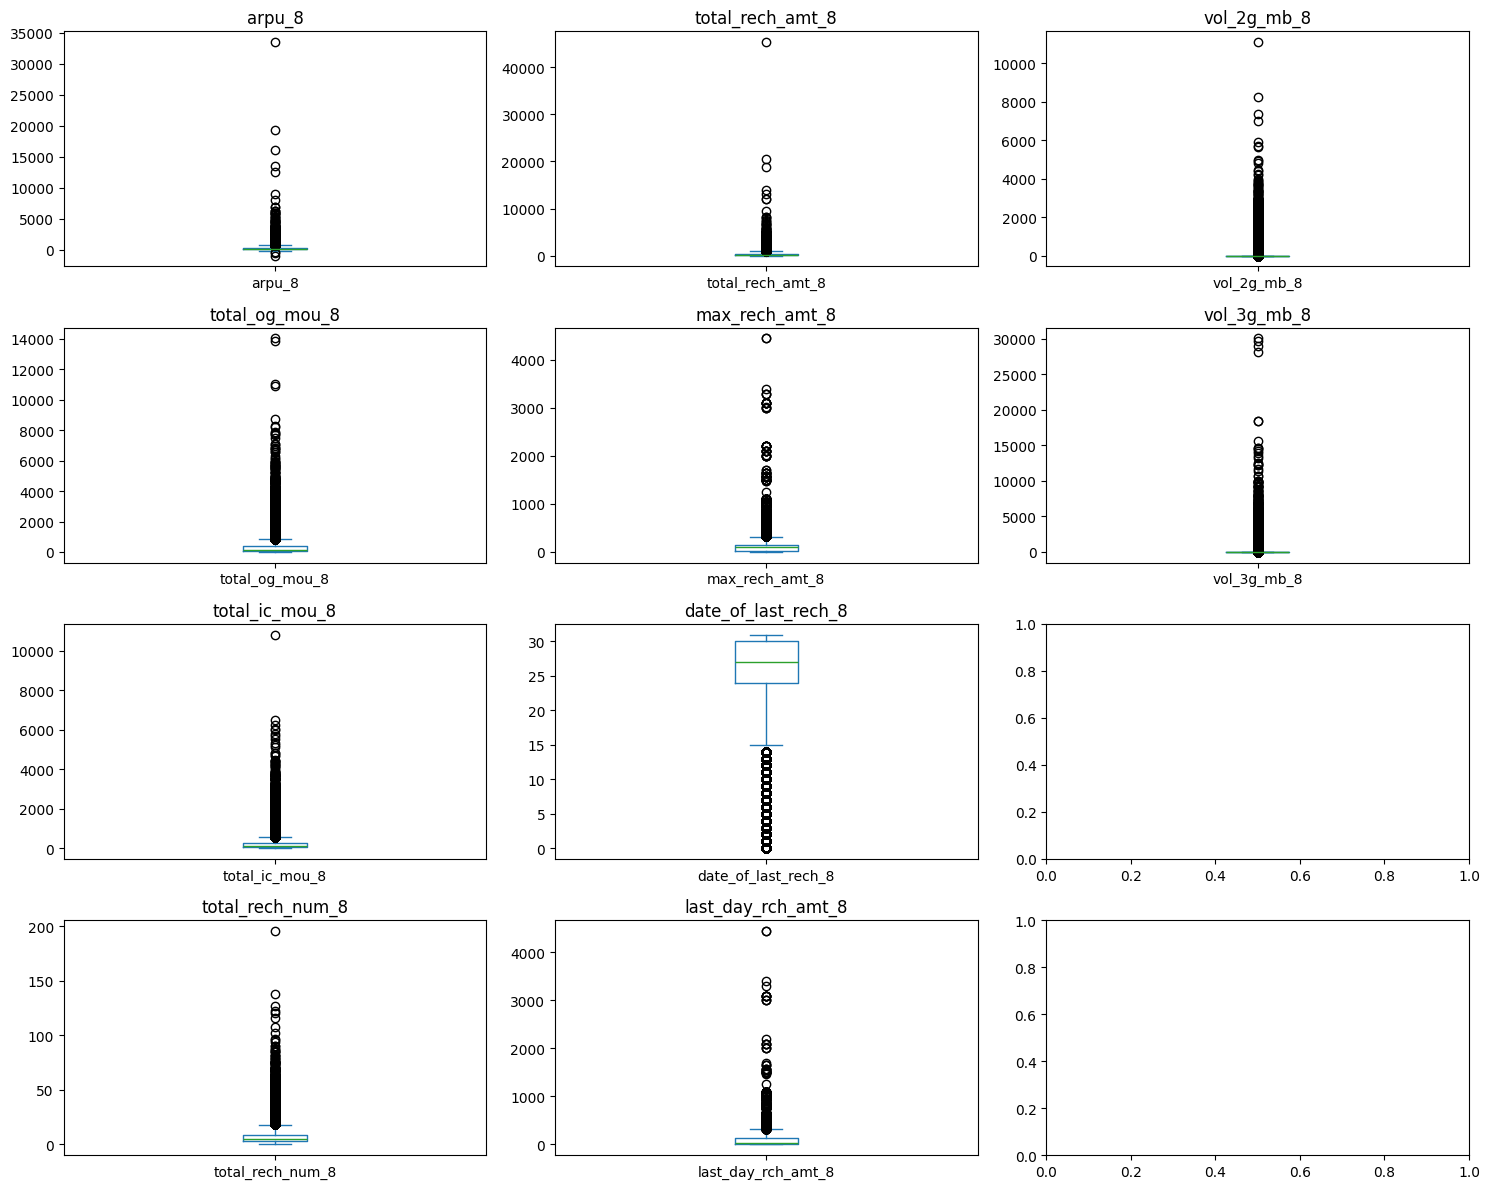

In [89]:
boxPlotGroup(data8,col8)

### Obeservations


- Correlation Map shows the same corrleation over 3 months 
- Only one column which has variation is number of days since reacharge, as it might increase as the month goes
- The total recharge amount has almost all columns positively associated like 
    - Max recharge amount
    - High value customer flag
    - total Out going calls
- But total recharge column doesn't depends on mobile data used, age on network or even churn risk 
- These are expected as per domain understanding 

**Listing out some critical value, above which the data seem to be disconnected from others, we'll exclude such records**
- arpu  > 20000
- total_rech_amt > 30000
- 2g mb = 7000
- og > 9000
- max_rech_amt >2500 also one point at =4000
- 3g mb 25000
- ic > 8000
- rech_num > 150 
- last_rech_amt > 3000

In [113]:
out1 = data8[(data8.total_rech_amt_6 > 20000) | (data8.total_rech_amt_7 > 20000) | (data8.total_rech_amt_8 > 20000)]
out1

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,HVC,churn,day_rech
38610,27731.088,35145.834,33543.624,3237.51,3873.74,3645.23,551.04,525.71,596.03,29,17,19,35190,40335,45320,3100,3100,3100,25.0,30.0,31.0,3100,3100,35,0.0,0.0,0.0,0.0,0.0,0.0,460,1,0,0.0
93779,5687.240,7287.334,19295.904,1293.78,1461.81,233.51,368.96,461.74,228.24,10,12,25,5195,6926,20405,790,974,1580,30.0,26.0,31.0,565,790,1464,0.0,0.0,0.0,0.0,0.0,0.0,2720,1,0,0.0


In [114]:
out2 = data8[(data8.total_og_mou_6 > 10000) | (data8.total_og_mou_7 > 10000) | (data8.total_og_mou_8 > 10000)]
out2

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,HVC,churn,day_rech
2505,3157.411,796.111,1664.808,10674.03,2615.14,11046.74,1637.23,1460.39,809.06,41,14,22,3803,808,2018,250,110,144,30.0,29.0,30.0,110,30,130,0.00,0.00,0.00,0.0,0.0,0.0,1216,1,0,1.0
27493,1325.877,1474.408,1386.445,3759.93,8224.16,10882.86,136.96,190.26,124.59,28,31,37,1683,1648,1734,128,297,297,30.0,31.0,31.0,21,30,130,719.21,536.96,350.39,0.0,0.0,0.0,513,1,0,0.0
33035,2854.958,4234.590,5035.192,7329.11,11365.31,13848.26,148.24,110.98,94.69,32,42,37,3360,4808,5909,128,169,349,30.0,30.0,30.0,128,169,144,0.00,0.00,0.00,0.0,0.0,0.0,423,1,0,1.0
92272,251.667,963.879,5748.252,0.00,2548.71,14043.06,0.00,30.43,36.78,3,20,30,100,1506,7443,50,279,279,17.0,31.0,31.0,50,279,279,0.00,0.00,0.00,0.0,0.0,0.0,411,1,0,0.0


In [115]:
out3 = data8[(data8.vol_2g_mb_6 > 7000) | (data8.vol_2g_mb_7 > 7000) | (data8.vol_2g_mb_8 > 7000)]
out3

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,HVC,churn,day_rech
3569,822.637,941.817,676.026,185.59,131.58,207.46,45.18,66.96,43.33,50,60,38,940,1090,758,50,30,198,30.0,31.0,31.0,20,20,20,0.00,5471.05,7374.19,0.00,0.00,0.00,352,1,0,0.0
7015,959.666,1236.814,1602.138,1438.08,1325.98,2182.98,179.64,256.56,198.04,13,12,22,1107,1465,1867,198,198,248,26.0,27.0,31.0,65,128,50,7213.06,7873.55,7027.18,0.00,0.00,0.00,526,1,0,0.0
37342,1528.942,1554.494,731.184,250.24,238.01,327.06,73.51,64.39,131.96,23,25,22,1779,1853,872,855,655,198,30.0,31.0,29.0,0,50,50,10285.90,5592.25,8255.67,7397.77,7657.96,1287.44,359,1,0,2.0
38709,163.645,1176.987,1843.077,15.65,59.43,47.11,19.96,84.64,77.73,13,42,52,192,1400,2197,46,98,98,30.0,31.0,31.0,46,46,46,504.34,5606.29,11117.61,0.00,0.00,0.00,620,1,0,0.0
44999,336.451,167.863,167.880,0.21,0.00,1.46,85.49,101.29,171.23,5,2,2,396,198,198,198,198,198,19.0,9.0,10.0,198,0,198,7755.23,3842.59,3241.01,0.00,0.00,0.00,1667,0,0,21.0


In [116]:
out4 = data8[(data8.max_rech_amt_6 > 4000) | (data8.max_rech_amt_7 > 4000) | (data8.max_rech_amt_8 > 4000)]
out4

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,HVC,churn,day_rech
588,514.479,-2014.045,3269.79,5291.01,5596.41,5345.71,51.98,64.09,52.94,2,2,0,3011,5011,0,2010,4010,0,2.0,21.0,0.0,2010,4010,0,0.00,0.0,0.0,0.0,0.0,0.0,235,1,0,41.0
34299,580.869,806.924,1624.22,450.98,599.76,961.41,2371.58,2362.46,2664.08,4,3,1,720,550,4449,619,550,4449,17.0,17.0,1.0,619,550,4449,7.06,0.0,0.0,88.0,0.0,0.0,383,1,0,30.0
79965,331.741,414.720,452.80,191.46,231.38,282.11,240.38,389.94,301.54,3,3,1,610,500,4449,500,500,4449,23.0,28.0,17.0,500,500,4449,0.00,0.0,0.0,0.0,0.0,0.0,2469,1,0,14.0
84160,-2258.709,2355.950,4019.65,6039.33,4469.98,7697.53,8.16,21.58,40.34,1,0,1,4010,0,104,4010,0,104,26.0,0.0,11.0,4010,0,104,0.00,0.0,0.0,0.0,0.0,0.0,237,1,0,20.0


In [117]:
out5 = data8[(data8.vol_3g_mb_6 > 25000) | (data8.vol_3g_mb_7 > 25000) | (data8.vol_3g_mb_8 > 25000)]
out5

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,HVC,churn,day_rech
27531,5034.040,3711.661,3459.269,1.73,0.00,10.19,0.03,0.00,0.00,5,5,5,5920,4365,4091,1555,1555,1555,26.0,27.0,30.0,1555,1555,1555,0.01,0.12,0.14,45735.40,27600.29,30036.06,222,1,0,1.0
46998,2645.595,3201.223,821.585,9.61,0.00,10.46,2.74,1.00,2.13,4,6,3,3110,3765,1001,1555,1555,951,17.0,27.0,20.0,1555,1555,951,24.43,1287.08,38.46,26826.13,17030.29,28065.93,398,1,0,11.0
65258,258.307,224.900,214.400,308.96,180.39,316.29,47.93,73.79,80.81,7,6,3,200,400,200,200,200,200,27.0,31.0,26.0,0,0,0,0.00,0.00,0.00,10030.84,21393.23,28919.68,290,0,0,5.0
76379,202.634,36.354,0.000,19.79,16.98,0.00,6.33,0.33,0.00,5,7,3,238,40,0,198,30,0,27.0,31.0,24.0,0,0,0,5.87,0.00,0.00,25692.06,140.09,0.00,367,0,1,7.0
90187,1168.360,1556.007,1695.625,9.54,4.14,8.96,1.89,2.14,1.28,54,71,75,1370,1820,1735,110,110,130,30.0,31.0,31.0,50,50,50,766.87,8.94,1.32,18840.70,22613.10,29651.83,617,1,0,0.0
95424,1122.070,5298.833,1791.996,175.74,154.99,291.38,313.48,224.61,307.41,9,39,20,1358,6206,2130,252,455,252,30.0,29.0,25.0,252,455,50,0.00,251.30,187.38,3352.90,28144.12,5282.35,854,1,0,6.0


In [118]:
out6 = data8[(data8.total_ic_mou_6 > 8000) | (data8.total_ic_mou_7 > 8000) | (data8.total_ic_mou_8 > 25000)]
out6

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,HVC,churn,day_rech
23976,381.69,190.842,512.898,367.73,707.86,798.66,5530.79,9699.01,6256.38,3,1,4,450,225,605,225,225,225,30.0,18.0,29.0,225,225,25,0.0,0.00,12.23,0.0,0.0,0.0,2960,0,0,2.0
76601,0.00,159.942,132.568,0.00,37.41,0.00,0.00,8351.56,10830.38,1,2,4,0,184,184,0,154,154,14.0,8.0,31.0,0,154,30,0.0,197.75,370.92,0.0,0.0,0.0,396,0,0,0.0


In [119]:
out7 = data8[(data8.total_rech_num_6 > 150) | (data8.total_rech_num_7 > 150) | (data8.total_rech_num_8 > 25000)]
out7

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,HVC,churn,day_rech
31087,2445.875,54.91,93.225,4774.74,51.74,85.78,421.51,8.99,23.13,307,4,8,2840,50,100,47,20,20,28.0,28.0,29.0,20,10,10,0.0,0.0,0.0,0.0,0.0,0.0,521,1,0,2.0
71491,1396.995,617.61,385.243,2120.61,766.68,616.01,169.93,305.68,228.86,170,74,47,1606,704,435,20,30,20,30.0,31.0,31.0,10,10,9,0.0,0.0,0.0,0.0,0.0,0.0,706,1,0,0.0


In [120]:
out8 = data8[(data8.last_day_rch_amt_6 > 3000) | (data8.last_day_rch_amt_7 > 3000) | (data8.last_day_rch_amt_8 > 25000)]
out8

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,HVC,churn,day_rech
588,514.479,-2014.045,3269.790,5291.01,5596.41,5345.71,51.98,64.09,52.94,2,2,0,3011,5011,0,2010,4010,0,2.0,21.0,0.0,2010,4010,0,0.0,0.0,0.0,0.0,0.0,0.0,235,1,0,41.0
2777,-2041.228,3972.710,-945.808,5605.33,6624.98,7460.53,65.38,63.78,68.61,3,0,3,5021,0,5021,3010,0,3010,17.0,0.0,28.0,3010,0,3010,0.0,0.0,0.0,0.0,0.0,0.0,1038,1,0,3.0
9989,6515.060,1923.951,323.721,268.44,177.71,220.23,455.48,226.11,203.24,4,2,2,6250,3000,3000,3150,3000,3000,15.0,19.0,28.0,3100,0,3000,0.0,0.0,0.0,0.0,0.0,0.0,488,1,0,3.0
14039,188.782,379.838,341.486,231.24,326.04,184.33,658.18,424.78,460.01,5,0,0,3600,0,0,3350,0,0,24.0,0.0,0.0,3350,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2679,1,0,68.0
30382,514.680,561.760,-197.957,1124.31,950.13,1420.86,330.74,273.73,464.89,2,2,2,3299,3299,6698,3299,3299,3399,30.0,17.0,25.0,3299,0,3399,0.0,0.0,0.0,0.0,0.0,0.0,2626,1,0,6.0
38610,27731.088,35145.834,33543.624,3237.51,3873.74,3645.23,551.04,525.71,596.03,29,17,19,35190,40335,45320,3100,3100,3100,25.0,30.0,31.0,3100,3100,35,0.0,0.0,0.0,0.0,0.0,0.0,460,1,0,0.0
67717,11261.349,16820.145,12533.285,1503.28,1944.29,1517.36,210.74,155.96,211.63,71,26,34,13096,19204,13080,350,3100,3100,30.0,30.0,28.0,250,3100,3100,0.0,0.0,0.0,0.0,0.0,0.0,374,1,0,3.0
84160,-2258.709,2355.950,4019.650,6039.33,4469.98,7697.53,8.16,21.58,40.34,1,0,1,4010,0,104,4010,0,104,26.0,0.0,11.0,4010,0,104,0.0,0.0,0.0,0.0,0.0,0.0,237,1,0,20.0


In [125]:
outlier_df = pd.concat([out1,out2,out3,out4,out5,out6,out7,out8], ignore_index=False)


In [130]:
outlier_df.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,HVC,churn,day_rech
38610,27731.088,35145.834,33543.624,3237.51,3873.74,3645.23,551.04,525.71,596.03,29,17,19,35190,40335,45320,3100,3100,3100,25.0,30.0,31.0,3100,3100,35,0.00,0.00,0.00,0.0,0.0,0.0,460,1,0,0.0
93779,5687.240,7287.334,19295.904,1293.78,1461.81,233.51,368.96,461.74,228.24,10,12,25,5195,6926,20405,790,974,1580,30.0,26.0,31.0,565,790,1464,0.00,0.00,0.00,0.0,0.0,0.0,2720,1,0,0.0
2505,3157.411,796.111,1664.808,10674.03,2615.14,11046.74,1637.23,1460.39,809.06,41,14,22,3803,808,2018,250,110,144,30.0,29.0,30.0,110,30,130,0.00,0.00,0.00,0.0,0.0,0.0,1216,1,0,1.0
27493,1325.877,1474.408,1386.445,3759.93,8224.16,10882.86,136.96,190.26,124.59,28,31,37,1683,1648,1734,128,297,297,30.0,31.0,31.0,21,30,130,719.21,536.96,350.39,0.0,0.0,0.0,513,1,0,0.0
33035,2854.958,4234.590,5035.192,7329.11,11365.31,13848.26,148.24,110.98,94.69,32,42,37,3360,4808,5909,128,169,349,30.0,30.0,30.0,128,169,144,0.00,0.00,0.00,0.0,0.0,0.0,423,1,0,1.0


In [128]:
data9 = data8.copy() # data checkpoint
print(data9.shape) # shape before droping records

data9 = data9.drop(outlier_df.index)

print(data9.shape) #shape after droping records

(99999, 34)
(99969, 34)


## Class Imbalance

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [134]:
data10 = data9.copy() # data checkpoint
X = data10.drop('churn', axis=1)
y = data10['churn']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [136]:
# Undersample the training data to create a balanced dataset
undersampler = RandomUnderSampler(random_state=42)
undersampled_X_train, undersampled_y_train = undersampler.fit_resample(X_train, y_train)


In [143]:
undersampled_y_train.value_counts()

0    8123
1    8123
Name: churn, dtype: int64

In [144]:
data10.shape[0]

99969

In [145]:
undersampled_y_train.shape

(16246,)

## Principle Component Analysis

## Model Building

In [148]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Fit the model on the undersampled training data
model.fit(undersampled_X_train, undersampled_y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model's performance
# accuracy = evaluate_model(predictions, y_test)


In [151]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8038411523457037


In [152]:
confusion_matrix_result = confusion_matrix(y_test, predictions)
print("Confusion matrix:")
print(confusion_matrix_result)

Confusion matrix:
[[14427  3500]
 [  422  1645]]


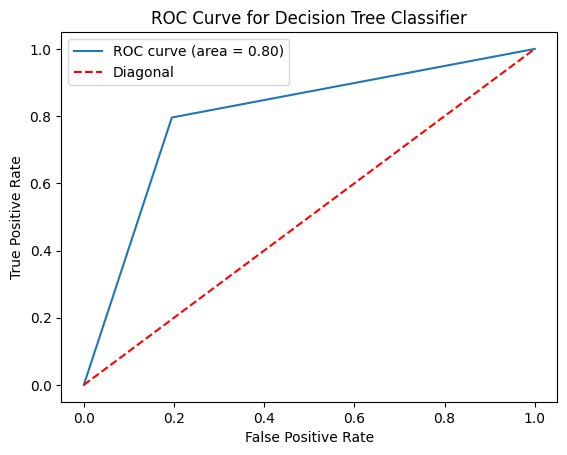

Area under curve (AUC): 0.8003015724498342


In [154]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Diagonal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

print("Area under curve (AUC):", roc_auc)

In [155]:
data10.shape

(99969, 34)

## Model Evalutation